# 七 PyTorch可视化

## 1 可视化网络结构

使用`torchinfo`工具包来可视化网络结构

### 1.1 使用print函数打印模型基础信息

In [21]:
import torchvision.models as models
model = models.resnet18()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

单纯的print(model)，只能得出基础构件的信息，既不能显示出每一层的shape，也不能显示对应参数量的大小

### 1.2 使用torchinfo可视化网络结构

- **torchinfo的安装**

```bash
# 安装方法一
pip install torchinfo 
# 安装方法二
conda install -c conda-forge torchinfo
```

- **torchinfo的使用**

使用 `torchinfo.summary()`就行了，必需的参数分别是model，input_size[batch_size,channel,h,w]，更多参数可以参考[documentation](https://github.com/TylerYep/torchinfo#documentation)。torchinfo提供了包括模块信息（每一层的类型、输出shape和参数量）、模型整体的参数量、模型大小、一次前向或者反向传播需要的内存大小等

In [22]:
import torchvision.models as models
from torchinfo import summary
resnet18 = models.resnet18() # 实例化模型
summary(resnet18, (1, 3, 224, 224)) # 1：batch_size 3:图片的通道数 224: 图片的高宽

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 1000]                 --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

## 2 CNN可视化

### 2.1 CNN卷积核可视化

卷积核在CNN中负责提取特征，可视化卷积核能够帮助理解模型提取哪些特征。特定层的卷积核即特定层的模型权重，可视化卷积核就等价于可视化对应的权重矩阵

In [23]:
import torch
from torchvision.models import vgg11

model = vgg11(pretrained=True)
print(dict(model.features.named_children()))

{'0': Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '1': ReLU(inplace=True), '2': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '3': Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '4': ReLU(inplace=True), '5': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '6': Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '7': ReLU(inplace=True), '8': Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '9': ReLU(inplace=True), '10': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '11': Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '12': ReLU(inplace=True), '13': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '14': ReLU(inplace=True), '15': MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), '16': Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), '17'

卷积核对应的应为卷积层（Conv2d），这里以第“3”层为例，可视化对应的参数：

torch.Size([128, 64, 3, 3])


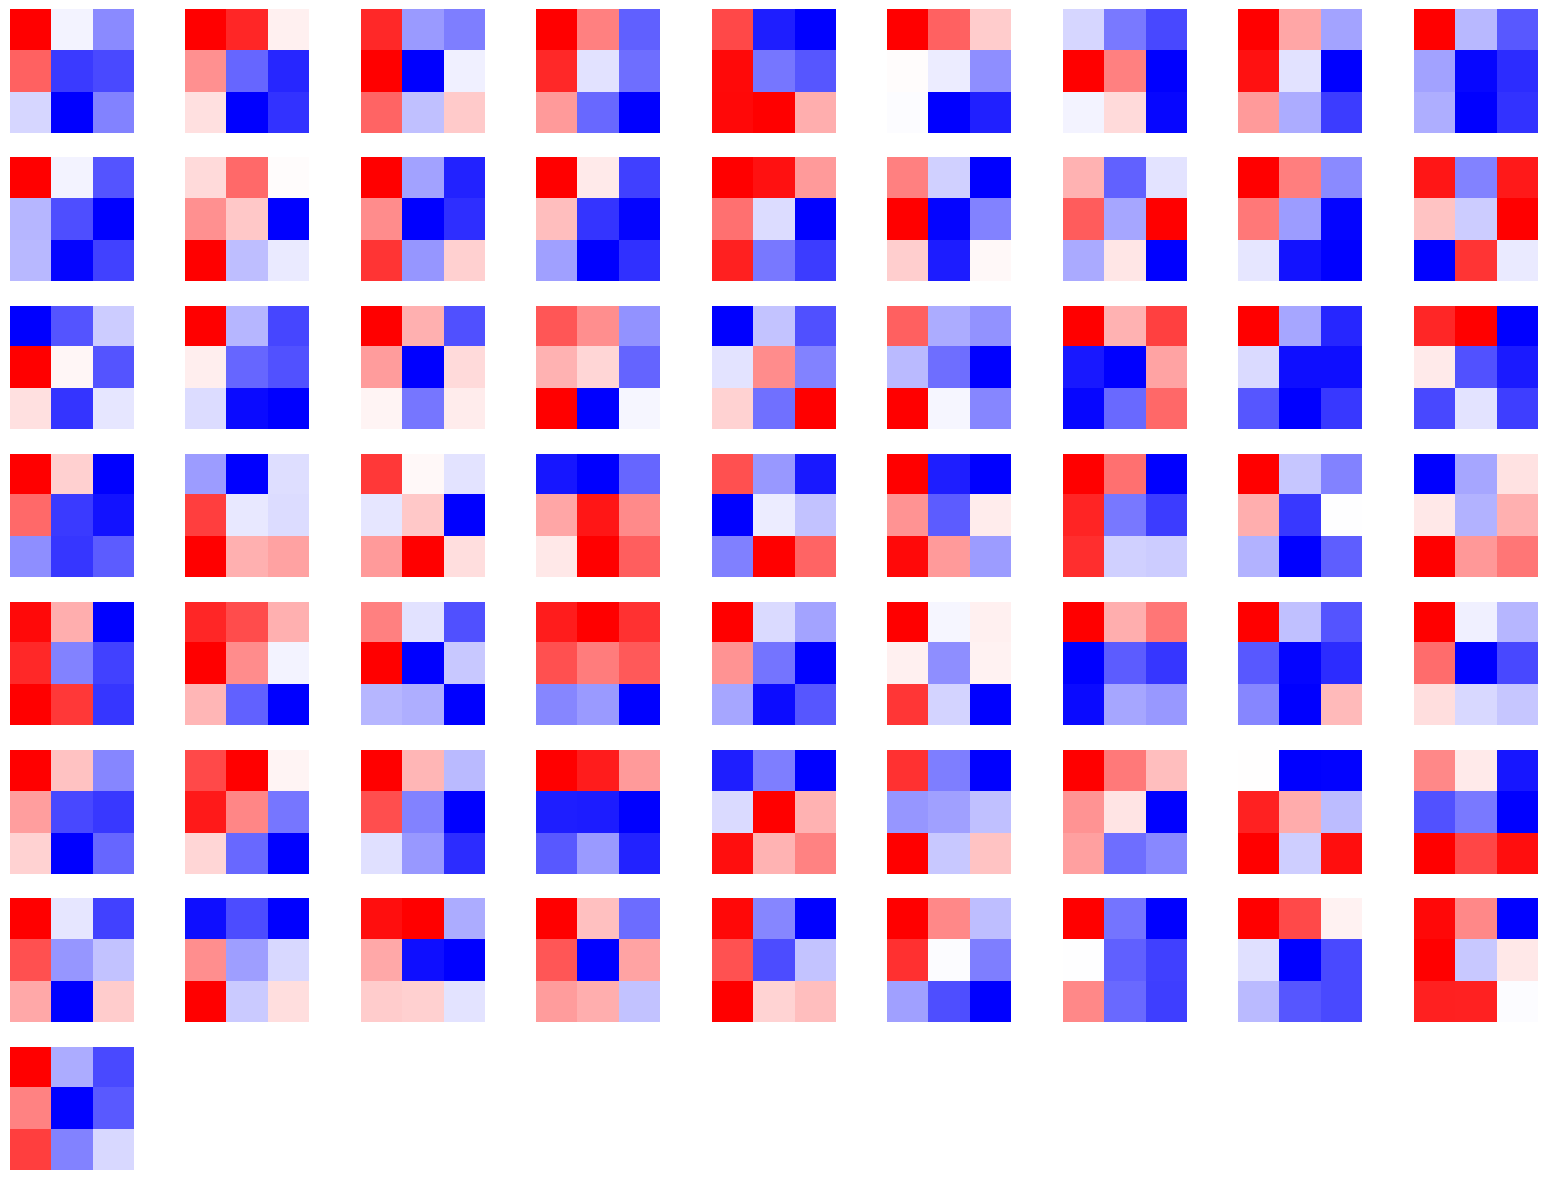

In [24]:
import matplotlib.pyplot as plt

conv1 = dict(model.features.named_children())['3']
# 得到第3层的卷积层参数
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)
# 该代码仅可视化其中一个维度的卷积核，第3层的卷积核有128*64个
# for i in range(0, num):
for i in range(0, 1):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1) 
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')

### 2.2 CNN特征图可视化方法

与卷积核相对应，输入的原始图像经过每次卷积层得到的数据称为特征图，可视化卷积核是为了看模型提取哪些特征，可视化特征图则是为了看模型提取到的特征是什么样子的。

- 使用PyTorch提供的`hook`结构，得到网络在前向传播过程中的某一层的特征图。

In [25]:
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None
    

def plot_feature(model, idx, inputs):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    # forward_model(model,False)
    model.eval()
    _ = model(inputs)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(20, 17))
    

    for ftidx in range(total_ft):
        if ftidx > 99:
            break
        ft = first_item[ftidx]
        plt.subplot(10, 10, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())


首先实现了一个hook类，之后在plot_feature函数中，将该hook类的对象注册到要进行可视化的网络的某层中。model在进行前向传播的时候会调用hook的__call__函数，我们也就是在那里存储了当前层的输入和输出。这里的features_out_hook 是一个list，每次前向传播一次，都是调用一次，也就是features_out_hook  长度会增加1。

### 2.3 CNN class activation map可视化方法

class activation map （CAM）的作用是判断哪些变量对模型来说是重要的，在CNN可视化的场景下，即判断图像中哪些像素点对预测结果是重要的。除了确定重要的像素点，人们也会对重要区域的梯度感兴趣，因此在CAM的基础上也进一步改进得到了Grad-CAM（以及诸多变种）。

- 安装

```bash
pip install grad-cam
```

- 一个简单的例子

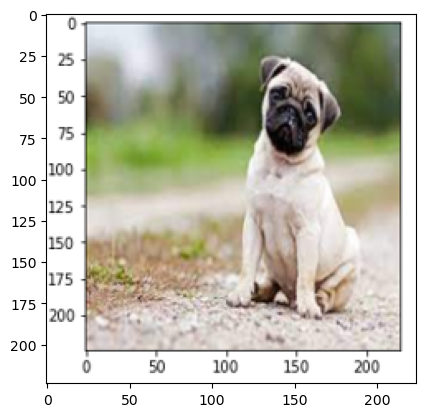

In [26]:
import torch
from torchvision.models import vgg11,resnet18,resnet101,resnext101_32x8d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = vgg11(pretrained=True)
img_path = './images/ch07/dog.png'
# resize操作是为了和传入神经网络训练图片大小一致
img = Image.open(img_path).resize((224,224))
# 需要将原始图片转为np.float32格式并且在0-1之间 
rgb_img = np.float32(img)/255
plt.imshow(img)


<class 'numpy.ndarray'>


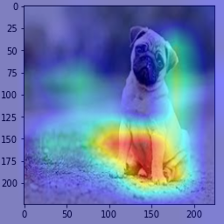

In [27]:
from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# 将图片转为tensor
img_tensor = torch.from_numpy(rgb_img).permute(2,0,1).unsqueeze(0)

target_layers = [model.features[-1]]
# 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
cam = GradCAM(model=model,target_layers=target_layers)
# targets = [ClassifierOutputTarget(preds)]   
targets = [ClassifierOutputTarget(200)]   
# 上方preds需要设定，比如ImageNet有1000类，这里可以设为200
grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
print(type(cam_img))
Image.fromarray(cam_img)


## 3 使用TensorBoard可视化训练过程

TensorBoard作为一款可视化工具可以可视化损失函数曲线、输入数据（尤其是图片）、模型结构、参数分布等

### 3.1 TensorBoard安装

- 使用PyTorch自带的`tensorboard`工具

- 或者安装使用`tensorboardX`
  ```sh
  pip install tensorboardX

  ```

### 3.2 TensorBoard可视化的基本逻辑

可以记录我们指定的数据，包括模型每一层的feature map，权重，以及训练loss等等。TensorBoard将记录下来的内容保存在一个用户指定的文件夹里，程序不断运行中TensorBoard会不断记录。记录下的内容可以通过网页的形式加以可视化

### 3.3 TensorBoard的配置与启动

- 配置：先指定一个文件,然后调用tensorboard中的SummaryWriter作为上述“记录员”

In [28]:
# # tensorboardX
# from tensorboardX import SummaryWriter

# 使用PyTorch自带的tensorboard
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./runs')


- 启动：

```sh
tensorboard --logdir=/path/to/logs/ --port=xxxx

```

其中“path/to/logs/"是指定的保存tensorboard记录结果的文件路径（等价于上面的“./runs"，port是外部访问TensorBoard的端口号，本地不需要，可以通过访问ip:port访问tensorboard

### 3.4 TensorBoard模型结构可视化

首先定义模型：

In [29]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

model = Net()
print(model)


Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (adaptive_pool): AdaptiveMaxPool2d(output_size=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


给定一个输入数据，前向传播后得到模型的结构，再通过TensorBoard进行可视化，使用`add_graph`：


In [30]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./runs')

writer.add_graph(model, input_to_model = torch.rand(1, 3, 224, 224))
writer.close()


![tb_model](./images/ch07/tb_model.png)

### 3.5 TensorBoard图像可视化

- 对于单张图片的显示使用`add_image``
- 对于多张图片的显示使用`add_images``
- 有时需要使用`torchvision.utils.make_grid`将多张图片拼成一张图片后，用`writer.add_image`显示

In [32]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose(
    [transforms.ToTensor()])
transform_test = transforms.Compose(
    [transforms.ToTensor()])

train_data = datasets.CIFAR10("./datasets/ch07", train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10("./datasets/ch07", train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

images, labels = next(iter(train_loader))
 
# 仅查看一张图片
writer = SummaryWriter('./pytorch_tb')
writer.add_image('images[0]', images[0])
writer.close()
 
# # 将多张图片拼接成一张图片，中间用黑色网格分割
# # create grid of images
# writer = SummaryWriter('./pytorch_tb')
# img_grid = torchvision.utils.make_grid(images)
# writer.add_image('image_grid', img_grid)
# writer.close()
 
# # 将多张图片直接写入
# writer = SummaryWriter('./pytorch_tb')
# writer.add_images("images",images,global_step = 0)
# writer.close()


Files already downloaded and verified
Files already downloaded and verified


![tb_images](./images/ch07/tb_images.png)

### 3.6 TensorBoard连续变量可视化

- 通过`add_scalar`实现：

In [33]:
writer = SummaryWriter('./pytorch_tb')
for i in range(500):
    x = i
    y = x**2
    writer.add_scalar("x", x, i) #日志中记录x在第step i 的值
    writer.add_scalar("y", y, i) #日志中记录y在第step i 的值
writer.close()


![tb_scalar](./images/ch07/tb_scalar.png)

- 显示多个曲线：如果想在同一张图中显示多个曲线，则需要分别建立存放子路径，同时在`add_scalar`中修改曲线的标签使其一致即可

In [36]:
writer1 = SummaryWriter('./pytorch_tb/x')
writer2 = SummaryWriter('./pytorch_tb/y')
for i in range(500):
    x = i
    y = x*2
    writer1.add_scalar("same", x, i) #日志中记录x在第step i 的值
    writer2.add_scalar("same", y, i) #日志中记录y在第step i 的值
writer1.close()
writer2.close()


![tb_scalar_twolines.png](./images/ch07/tb_scalar_twolines.png)

### 3.7 TensorBoard参数分布可视化

- 通过`add_histogram`实现

In [37]:
import torch
import numpy as np

# 创建正态分布的张量模拟参数矩阵
def norm(mean, std):
    t = std * torch.randn((100, 20)) + mean
    return t
 
writer = SummaryWriter('./pytorch_tb/')
for step, mean in enumerate(range(-10, 10, 1)):
    w = norm(mean, 1)
    writer.add_histogram("w", w, step)
    writer.flush()
writer.close()


![tb_hist](./images/ch07/tb_hist.png)

### 3.8 服务器端使用TensorBoard

需要进行相应的配置，才可以在本地浏览器，使用tensorboard查看服务器运行的训练过程

- 建立SSH隧道，实现远程端口到本机端口的转发
  - MobaXterm
  - Xshell

- SSH
  - 将服务器的6006端口重定向到自己机器上来
    1.  在服务上使用默认的6006端口正常启动tensorboard

    ```shell
    tensorboard --logdir=xxx --port=6006
    ```
    2.  在本地使用ssh命令，将服务器的6006端口重定向到自己机器上的16006端口

    ```shell
    ssh -L 16006:127.0.0.1:6006 username@remote_server_ip
    ```
    3.  在本地的浏览器输入地址
   
    ```shell
    127.0.0.1:16006 或者 localhost:16006
    ```